<a href="https://colab.research.google.com/github/alejandroariaszuluaga/Machine-Learning/blob/master/examen2_suenos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen 2: Clasificación de Estados de Sueño**

Inicialmente, se procede a descargar los datos correspondientes a cada paciente. Así como realizar la instalación de la librería *pyedflib*, la cual permite la lectura de los datos en formato *.edf* de forma sencilla.

In [0]:
!pip install pyedflib
!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4001E0-PSG.edf
!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4001EC-Hypnogram.edf

!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4002E0-PSG.edf
!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4002EC-Hypnogram.edf

!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4011E0-PSG.edf
!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4002EC-Hypnogram.edf

!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4012E0-PSG.edf
!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4012EC-Hypnogram.edf

!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4021E0-PSG.edf
!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4021EH-Hypnogram.edf

!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4022E0-PSG.edf
!wget https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4022EJ-Hypnogram.edf

     |████████████████████████████████| 1.1MB 9.0MB/s 
  Created wheel for pyedflib: filename=pyEDFlib-0.1.15-cp36-cp36m-linux_x86_64.whl size=920120 sha256=ad9c44341508a3b448564962b63dc2f0563b496c82345aa96760b469567c1c63
  Stored in directory: /root/.cache/pip/wheels/57/e3/8e/ce6236e9ada08b8ff91ef922c7418dbd66f1182dfbb22f8579
Successfully built pyedflib
--2019-11-22 14:26:57--  https://archive.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4001E0-PSG.edf
Resolving archive.physionet.org (archive.physionet.org)... 128.30.30.88
Connecting to archive.physionet.org (archive.physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48338048 (46M) [application/octet-stream]
Saving to: ‘SC4001E0-PSG.edf’

SC4001E0-PSG.edf    100%[===================>]  46.10M  25.6MB/s    in 1.8s    

2019-11-22 14:26:59 (25.6 MB/s) - ‘SC4001E0-PSG.edf’ saved [48338048/48338048]

--2019-11-22 14:27:01--  https://archive.physionet.org/physiobank/databa

**Lectura de datos y conversión a valores numéricos**

In [0]:
import pyedflib as pyedf
import numpy as np
import matplotlib.pyplot as ptl
# Lectura del archivo de estados de sueño (etiquetas)
st_FileHypEdf = pyedf.EdfReader("SC4002EC-Hypnogram.edf")
#print(st_FileHypEdf)
# Datos en ventanas de 30 segundos,
#v_HypTime es el tiempo de inicio, v_HypDur es la duración en un estado específico (pueden ser varias ventanas),

# v_Hyp es la ETIQUETA.
v_HypTime, v_HypDur, v_Hyp = st_FileHypEdf.readAnnotations()

#ptl.figure()
#ptl.scatter(v_HypTime, v_Hyp)
# Lectura de las señales s_SigNum señales con nombres v_Signal_Labels
st_FileEdf = pyedf.EdfReader("SC4002E0-PSG.edf")
#print(st_FileEdf)
s_SigNum = st_FileEdf.signals_in_file
#print(s_SigNum)
v_Signal_Labels = st_FileEdf.getSignalLabels()
# Conversion a segundos usando frecuencia de muestreo.
s_SigRef = 0
s_NSamples = st_FileEdf.getNSamples()[0]
s_FsHz = st_FileEdf.getSampleFrequency(s_SigRef)
#print(s_NSamples)
# v_Sig = np.zeros((s_NSamples, 1))

v_Sig = st_FileEdf.readSignal(s_SigRef)
v_Time = np.arange(0, s_NSamples) / s_FsHz

s_WinSizeSec = 30
s_WinSizeSam = np.round(s_FsHz * s_WinSizeSec)
# plot de señales en ventanas de 30s
#s_FirstInd = 0
#ptl.figure()
#while 1:
#    s_LastInd = s_FirstInd + s_WinSizeSam
#    if s_LastInd > s_NSamples:
#        break
#    ptl.plot(v_Time[s_FirstInd:s_LastInd], v_Sig[s_FirstInd:s_LastInd], linewidth=1)
#    ptl.xlabel('Time (sec)')
#    ptl.xlim(v_Time[s_FirstInd], v_Time[s_LastInd - 1])
#    ptl.pause(0.05)
#    s_FirstInd = s_LastInd
#ptl.show()

OSError: ignored

In [0]:
print(v_Time[-1],len(v_Time))

84899.99 8490000


**Gráfica de etiquetas respecto al tiempo**

Tiempo: 152 Etiqueta: 152


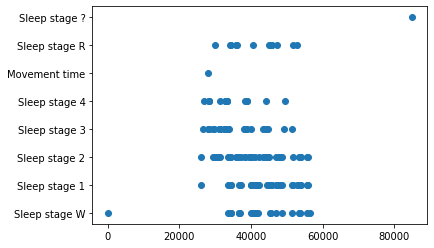

In [0]:
ptl.figure()
ptl.scatter(v_HypTime, v_Hyp)
print("Tiempo:", len(v_HypTime), "Etiqueta:", len(v_Hyp))

# Separación en ventanas de tiempo de 30 segundos

**Etiquetas:** se realizó un muestreo uniforme de las etiquetas anteriormente observadas para intervalos cada 30 segundos.

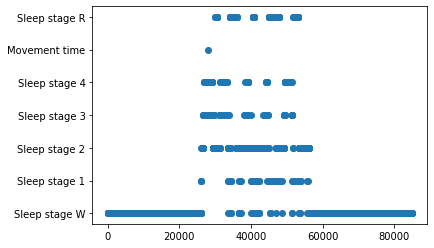

In [0]:
delta_min = 30
tiempo_div = [0]
etiquetas = []
for i in range(1, len(v_HypTime)): #No se toma el primer punto, ya que corresponde a t=0
  if v_HypTime[i] - tiempo_div[-1] <= delta_min:
    tiempo_div.append(v_HypTime[i])
    etiquetas.append(v_Hyp[i-1])
  else:
    t = tiempo_div[-1]
    while t < v_HypTime[i]:
      tiempo_div.append(tiempo_div[-1] + delta_min)
      etiquetas.append(v_Hyp[i-1])
      t = t + delta_min
etiquetas.append(etiquetas[-1])

tiempo_div = np.asarray(tiempo_div)
etiquetas = np.asarray(etiquetas)

ptl.figure()
ptl.scatter(tiempo_div, etiquetas)
#ptl.xlim(10,100)

**Señal en tiempo:** corresponde a la actividad cerebral recibida para cada etiqueta durante intervalos de 30 segundos.

In [0]:
datos_sig = []
datos_time = []
v_Time_list = v_Time.tolist()

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

for i in range(1, len(tiempo_div)):
  low_lim = v_Time_list.index( find_nearest(v_Time, tiempo_div[i-1]) )
  high_lim = v_Time_list.index( find_nearest(v_Time, tiempo_div[i]) )
  datos_sig.append(v_Sig[low_lim:high_lim])
  datos_time.append(v_Time[low_lim:high_lim])


In [0]:
len(datos_sig)

2830

# Preprocesamiento y Obtención de Descriptores

# Referencias

[1] Lozano, Fernando. *Clasificadores Combinados*. Universidad de los Andes (2019)

[2] Jrad, Nisrine. Phlypo, Ronald. Congedo, Marco. *SVM feature selection for multidimensional EEG data*

[3] Mustafa, Yazıcı. Mustafa, Ulutaş. Classification of EEG signals using time domain features.

[4] Palaniappan, Ramaswamy. Mandic, Danilo. *Biometrics from Brain Electrical Activity: A Machine Learning Approach*

[5] Mingyuan Zhao ; Mingtian Zhou ; Qingxin Zhu. Ping, Yang. Feature Extraction and Parameters Selection of Classification Model on Brain-Computer Interface

[6] Haykin, Simon. *New Directions in Statistical Signal Processing: from Systems to Brains.*
